In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [4]:
class MyFakerClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype = bool)


digits = load_digits()

y = (digits.target==7).astype(int)
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state = 11)

In [10]:
fakeclf = MyFakerClassifier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predict(X_test)
accuracy_score(y_test,fakepred)

0.9

In [12]:
from sklearn.metrics import confusion_matrix

result = confusion_matrix(y_test ,fakepred)
result

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [13]:
result.ravel()

array([405,   0,  45,   0], dtype=int64)

In [15]:
result.flatten()

array([405,   0,  45,   0], dtype=int64)

In [16]:
tn,fp,fn,tp = result.ravel()

In [19]:
tn, fp,fn,tp

(405, 0, 45, 0)

In [20]:
from sklearn.metrics  import accuracy_score,precision_score,recall_score

accuracy_score(y_test,fakepred) 

0.9

In [23]:
precision_score(y_test,fakepred)

C:\Users\geonh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [24]:
recall_score(y_test,fakepred)

0.0

In [25]:
import pandas as pd

titanic_train_df = pd.read_csv("./datasets/titanic_train.csv")
titanic_test_df = pd.read_csv("./datasets/titanic_test.csv")
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
mean = titanic_train_df['Age'].mean()
titanic_train_df['Age'] = titanic_train_df['Age'].fillna(mean)
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(mean)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic_train_df['Sex'])

titanic_train_df['Sex'] = le.transform(titanic_train_df['Sex'])
titanic_test_df['Sex'] = le.transform(titanic_test_df['Sex'])

In [28]:
gender_submission = pd.read_csv('./datasets/titanic_gender_submission.csv')

X_train_df = titanic_train_df[['Pclass','Sex','Age']]
y_train= titanic_train_df['Survived']

X_test_df = titanic_test_df[['Pclass','Sex','Age']]
y_test = gender_submission['Survived']


In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train_df,y_train)
pred = clf.predict(X_test_df)

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [31]:
print(accuracy_score(y_test,pred))
print(precision_score(y_test,pred))
print(recall_score(y_test,pred))


0.9593301435406698
0.9411764705882353
0.9473684210526315


In [33]:
from sklearn.metrics import f1_score

f1_score(y_test,pred)

0.9442622950819671

In [45]:
pred_proba = clf.predict_proba(X_test_df)
pred_prob

array([[0.92232018, 0.07767982],
       [0.59036093, 0.40963907],
       [0.90372443, 0.09627557],
       [0.90272831, 0.09727169],
       [0.38797784, 0.61202216],
       [0.85825226, 0.14174774],
       [0.45189641, 0.54810359],
       [0.74205361, 0.25794639],
       [0.35727188, 0.64272812],
       [0.88399385, 0.11600615],
       [0.91024113, 0.08975887],
       [0.63998506, 0.36001494],
       [0.06298783, 0.93701217],
       [0.90654503, 0.09345497],
       [0.12883174, 0.87116826],
       [0.17821168, 0.82178832],
       [0.79451026, 0.20548974],
       [0.88399385, 0.11600615],
       [0.42762085, 0.57237915],
       [0.57438273, 0.42561727],
       [0.70494528, 0.29505472],
       [0.83707088, 0.16292912],
       [0.07729494, 0.92270506],
       [0.43881354, 0.56118646],
       [0.13256393, 0.86743607],
       [0.95182263, 0.04817737],
       [0.06107656, 0.93892344],
       [0.88895228, 0.11104772],
       [0.60133811, 0.39866189],
       [0.91024113, 0.08975887],
       [0.

In [46]:
pred[0], pred_prob[0]

(0, array([0.92232018, 0.07767982]))

In [47]:
pred_prob[0].shape

(2,)

In [55]:
from sklearn.preprocessing import Binarizer

thresholds = [0.4,0.45,0.50,0.55,0.60]

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도:{accuracy:.4f}, 정밀도:{precision:.4f}, 재현율: {recall:.4f}, f1 : {f1score:.4f}')


def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0.4
오차행렬
[[237  29]
 [  0 152]]
정확도:0.9306, 정밀도:0.8398, 재현율: 1.0000, f1 : 0.9129
임계값 : 0.45
오차행렬
[[242  24]
 [  3 149]]
정확도:0.9354, 정밀도:0.8613, 재현율: 0.9803, f1 : 0.9169
임계값 : 0.5
오차행렬
[[257   9]
 [  8 144]]
정확도:0.9593, 정밀도:0.9412, 재현율: 0.9474, f1 : 0.9443
임계값 : 0.55
오차행렬
[[262   4]
 [ 13 139]]
정확도:0.9593, 정밀도:0.9720, 재현율: 0.9145, f1 : 0.9424
임계값 : 0.6
오차행렬
[[264   2]
 [ 44 108]]
정확도:0.8900, 정밀도:0.9818, 재현율: 0.7105, f1 : 0.8244


In [56]:
#sklearn.metrics.precision_recall_curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:,1])

In [58]:
precision , recall ,thresholds

(array([0.36363636, 0.36450839, 0.36538462, 0.36626506, 0.36714976,
        0.36803874, 0.36982968, 0.37163814, 0.37254902, 0.37346437,
        0.37530864, 0.37623762, 0.37717122, 0.37905237, 0.38      ,
        0.38383838, 0.3857868 , 0.44186047, 0.4457478 , 0.44705882,
        0.45103858, 0.45238095, 0.4592145 , 0.46060606, 0.46200608,
        0.46769231, 0.47648903, 0.48717949, 0.49190939, 0.49350649,
        0.49511401, 0.50165017, 0.51877133, 0.52413793, 0.52595156,
        0.53333333, 0.53900709, 0.54092527, 0.54285714, 0.54480287,
        0.54676259, 0.55072464, 0.55272727, 0.55474453, 0.55677656,
        0.55882353, 0.56088561, 0.56296296, 0.56716418, 0.56928839,
        0.57358491, 0.57794677, 0.58461538, 0.58687259, 0.58914729,
        0.59143969, 0.59375   , 0.59607843, 0.5984252 , 0.60079051,
        0.6031746 , 0.60557769, 0.61044177, 0.62295082, 0.63333333,
        0.63598326, 0.64135021, 0.64680851, 0.65236052, 0.65517241,
        0.66666667, 0.67555556, 0.68468468, 0.69

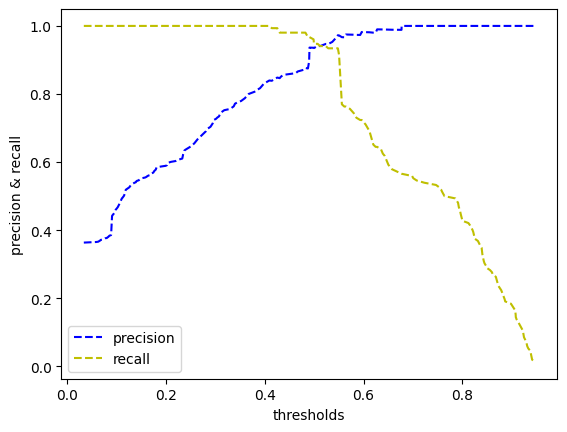

In [90]:
import matplotlib.pyplot as plt

plt.plot(thresholds,precision[:-1],'b--', label='precision')
plt.plot(thresholds,recall[:-1],'y--', label = 'recall')
plt.xlabel('thresholds')
plt.ylabel('precision & recall')
plt.legend()
plt.show()


#### sklearn.metrics.roc_curved
* sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)

In [100]:
from sklearn.metrics import roc_curve

In [105]:
fprs,tprs,thresholds = roc_curve(y_test,pred_proba[:,1])

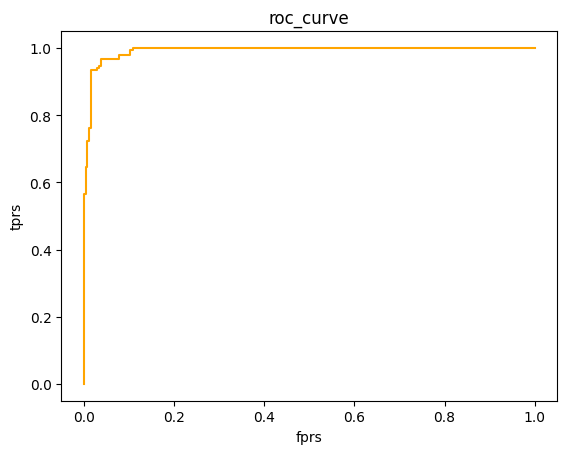

In [110]:
import matplotlib.pyplot as plt

plt.plot(fprs,tprs, color = 'orange',label = 'roc curve')
plt.xlabel('fprs')
plt.ylabel('tprs')
plt.title('roc_curve')
plt.show()

#### sklearn.metrics.roc_auc_score
* sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)[source]


In [114]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,pred_proba[:,1])

0.9918381480015829